# Diwali Sales Analysis

In [167]:
#importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
#loading the dataset
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [170]:
#checking the no. of rows and columns
df.shape

(11251, 15)

In [171]:
#checking the null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [172]:
#dropping columns with no data

df.drop(['unnamed1','Status'], axis = 1, inplace = True)

In [173]:
#Checking null Values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [174]:
#dropping null Values
df.dropna(inplace=True)

In [175]:
#null values dropped 
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [176]:
#Changing the datatype
df['Amount'] = df['Amount'].astype('int')

In [18]:
df['Amount'].dtype

dtype('int32')

In [177]:
#checking the column names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [178]:
#renaming the columns
df.rename(columns={'User_ID':'User ID', 'Cust_name':'Cust Name','Product_ID':'Product ID','Marital_Status':'Marital Status','Product_Category':'Product Category'}, inplace=True)

In [24]:
df

,User ID,Cust Name,Product ID,Gender,Age Group,Age,Marital Status,State,Zone,Occupation,Product Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [179]:
#checking descriptive stats of numerical columns
df.describe()

,User ID,Age,Marital Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [180]:
#checking descriptive stats of categorical columns
df.describe(include=object)

,Cust Name,Product ID,Gender,Age Group,State,Zone,Occupation,Product Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [181]:
#Checking the descriptive stats of selected numerical columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [182]:
#Checking the descriptive stats of selected categorical columns
df[['Gender','State','Occupation','Product Category']].describe()

,Gender,State,Occupation,Product Category
count,11239,11239,11239,11239
unique,2,16,15,18
top,F,Uttar Pradesh,IT Sector,Clothing & Apparel
freq,7832,1944,1583,2655


# Exploratory Data Analysis

# Gender

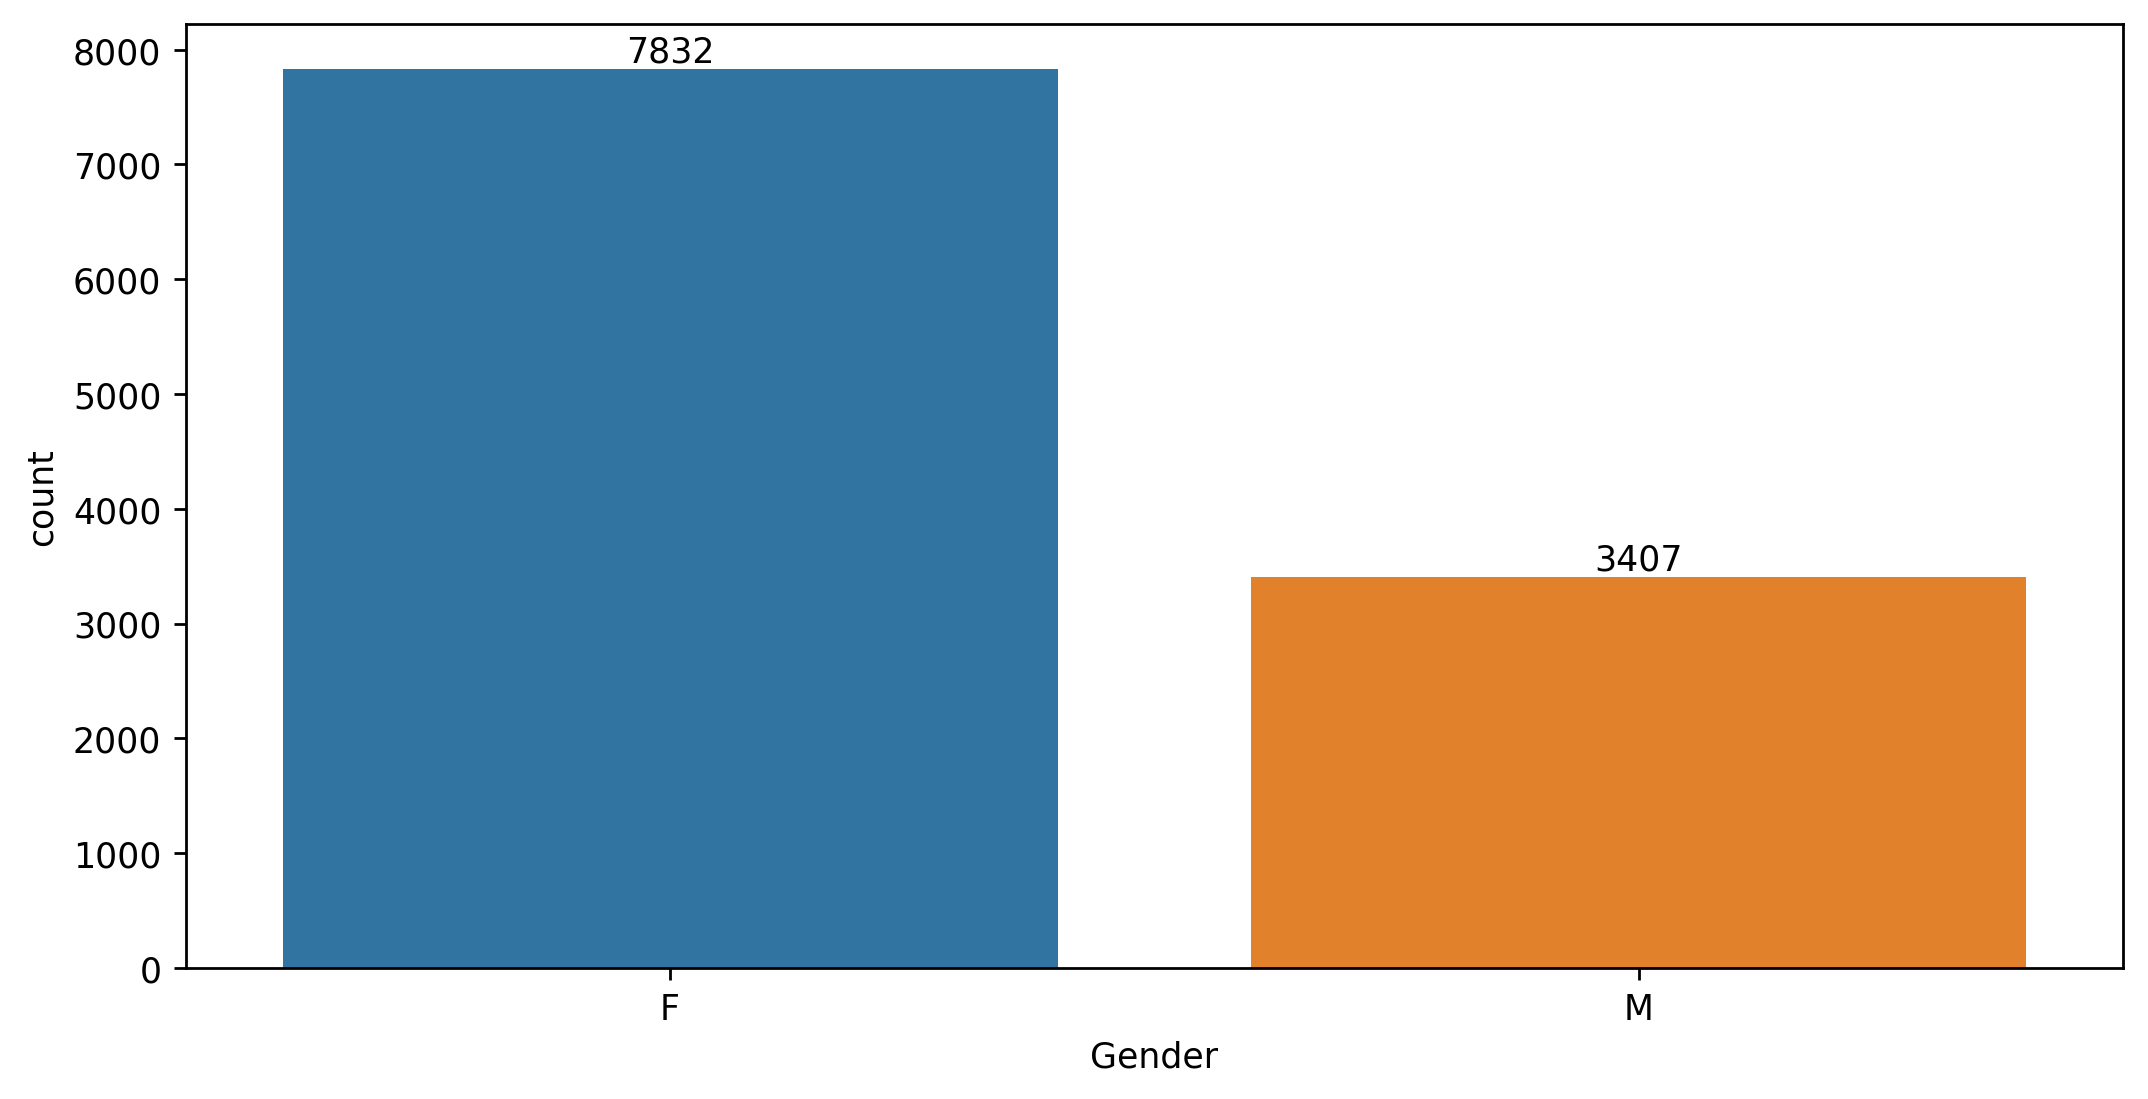

In [41]:
ax = sns.countplot(x= 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [45]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False) 
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

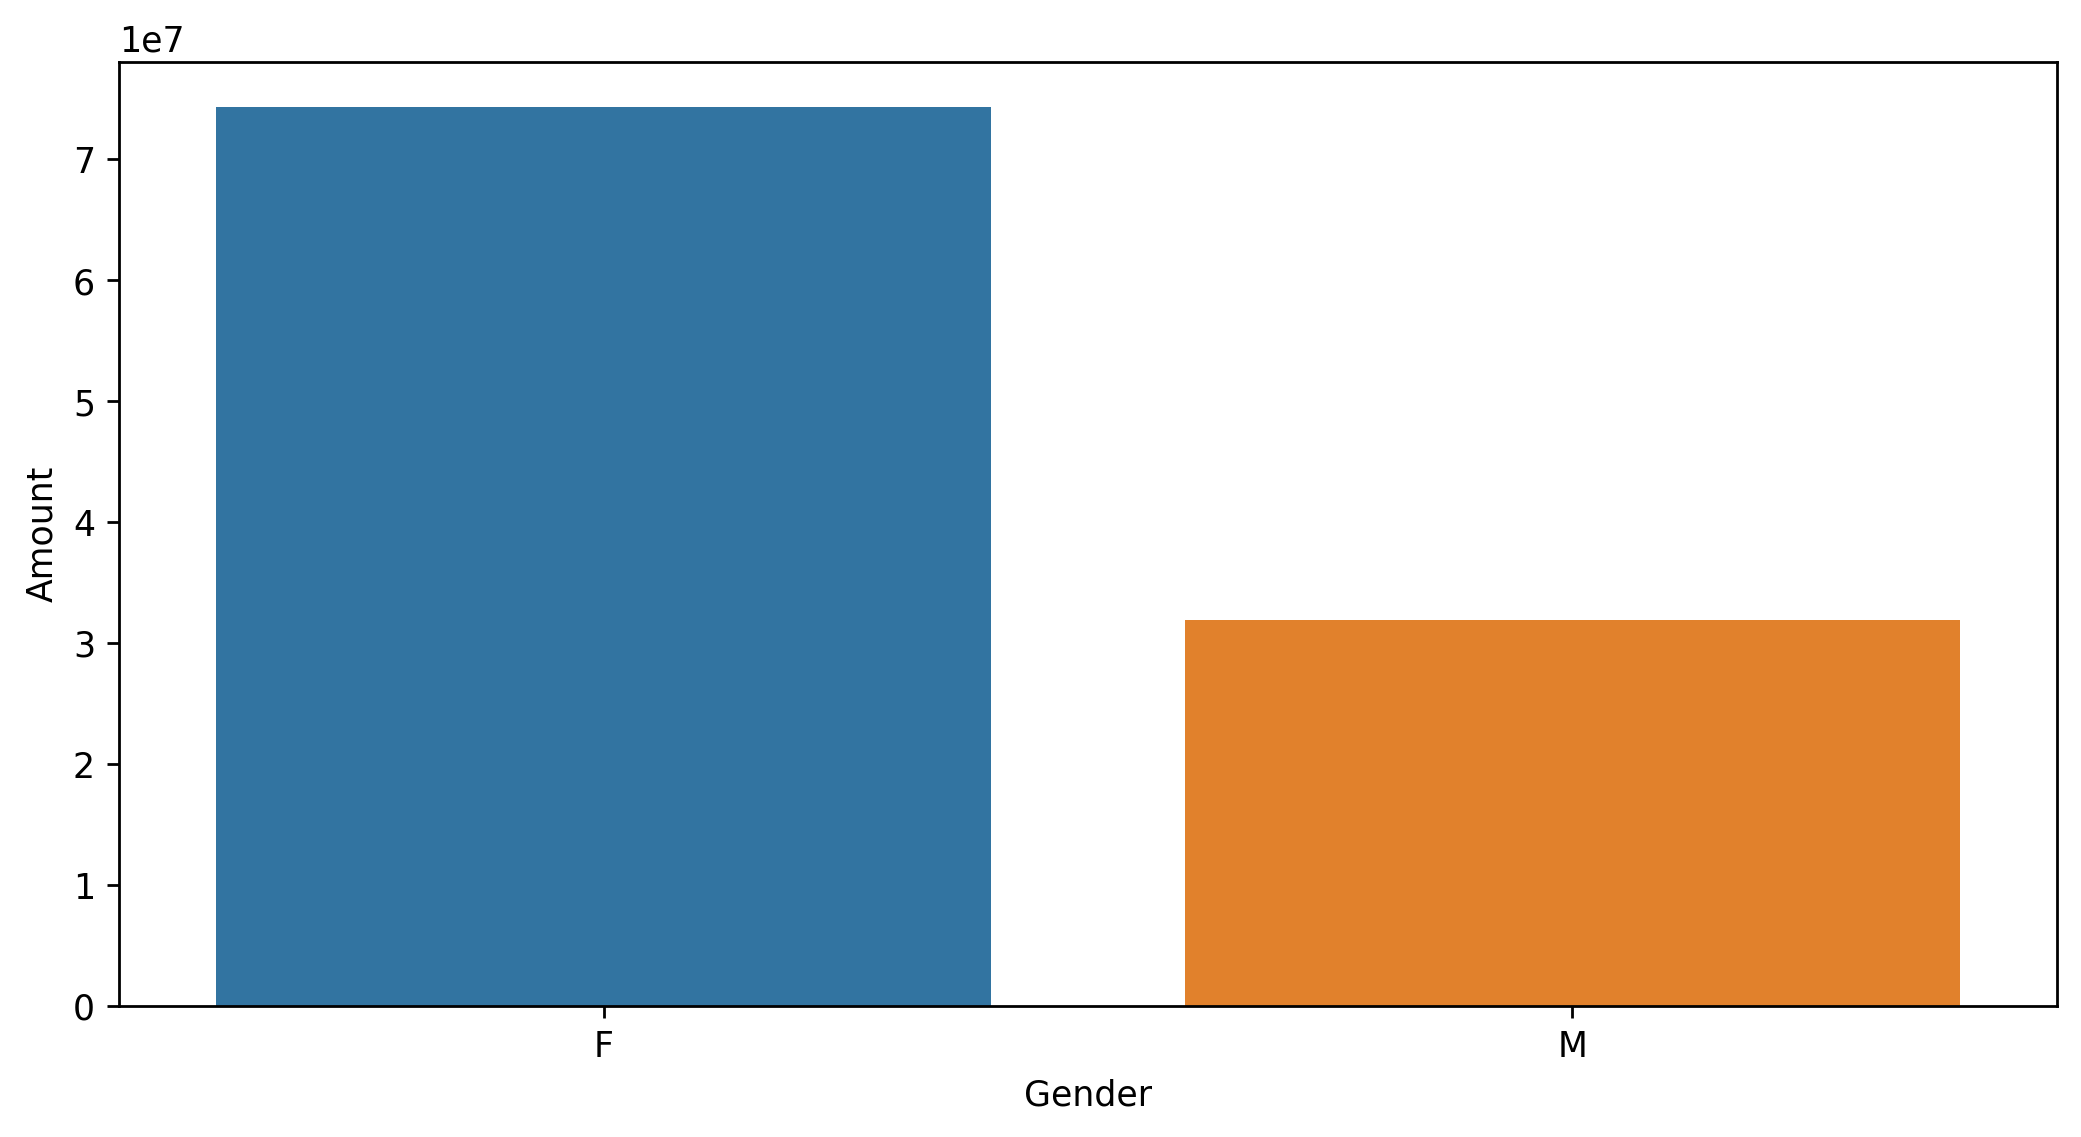

In [48]:
gs = sns.barplot(x='Gender', y= 'Amount', data=sales_gen)
gs

From the above graphs we can conclude that females are shopping more than men and are spending more amount as well.

# Age

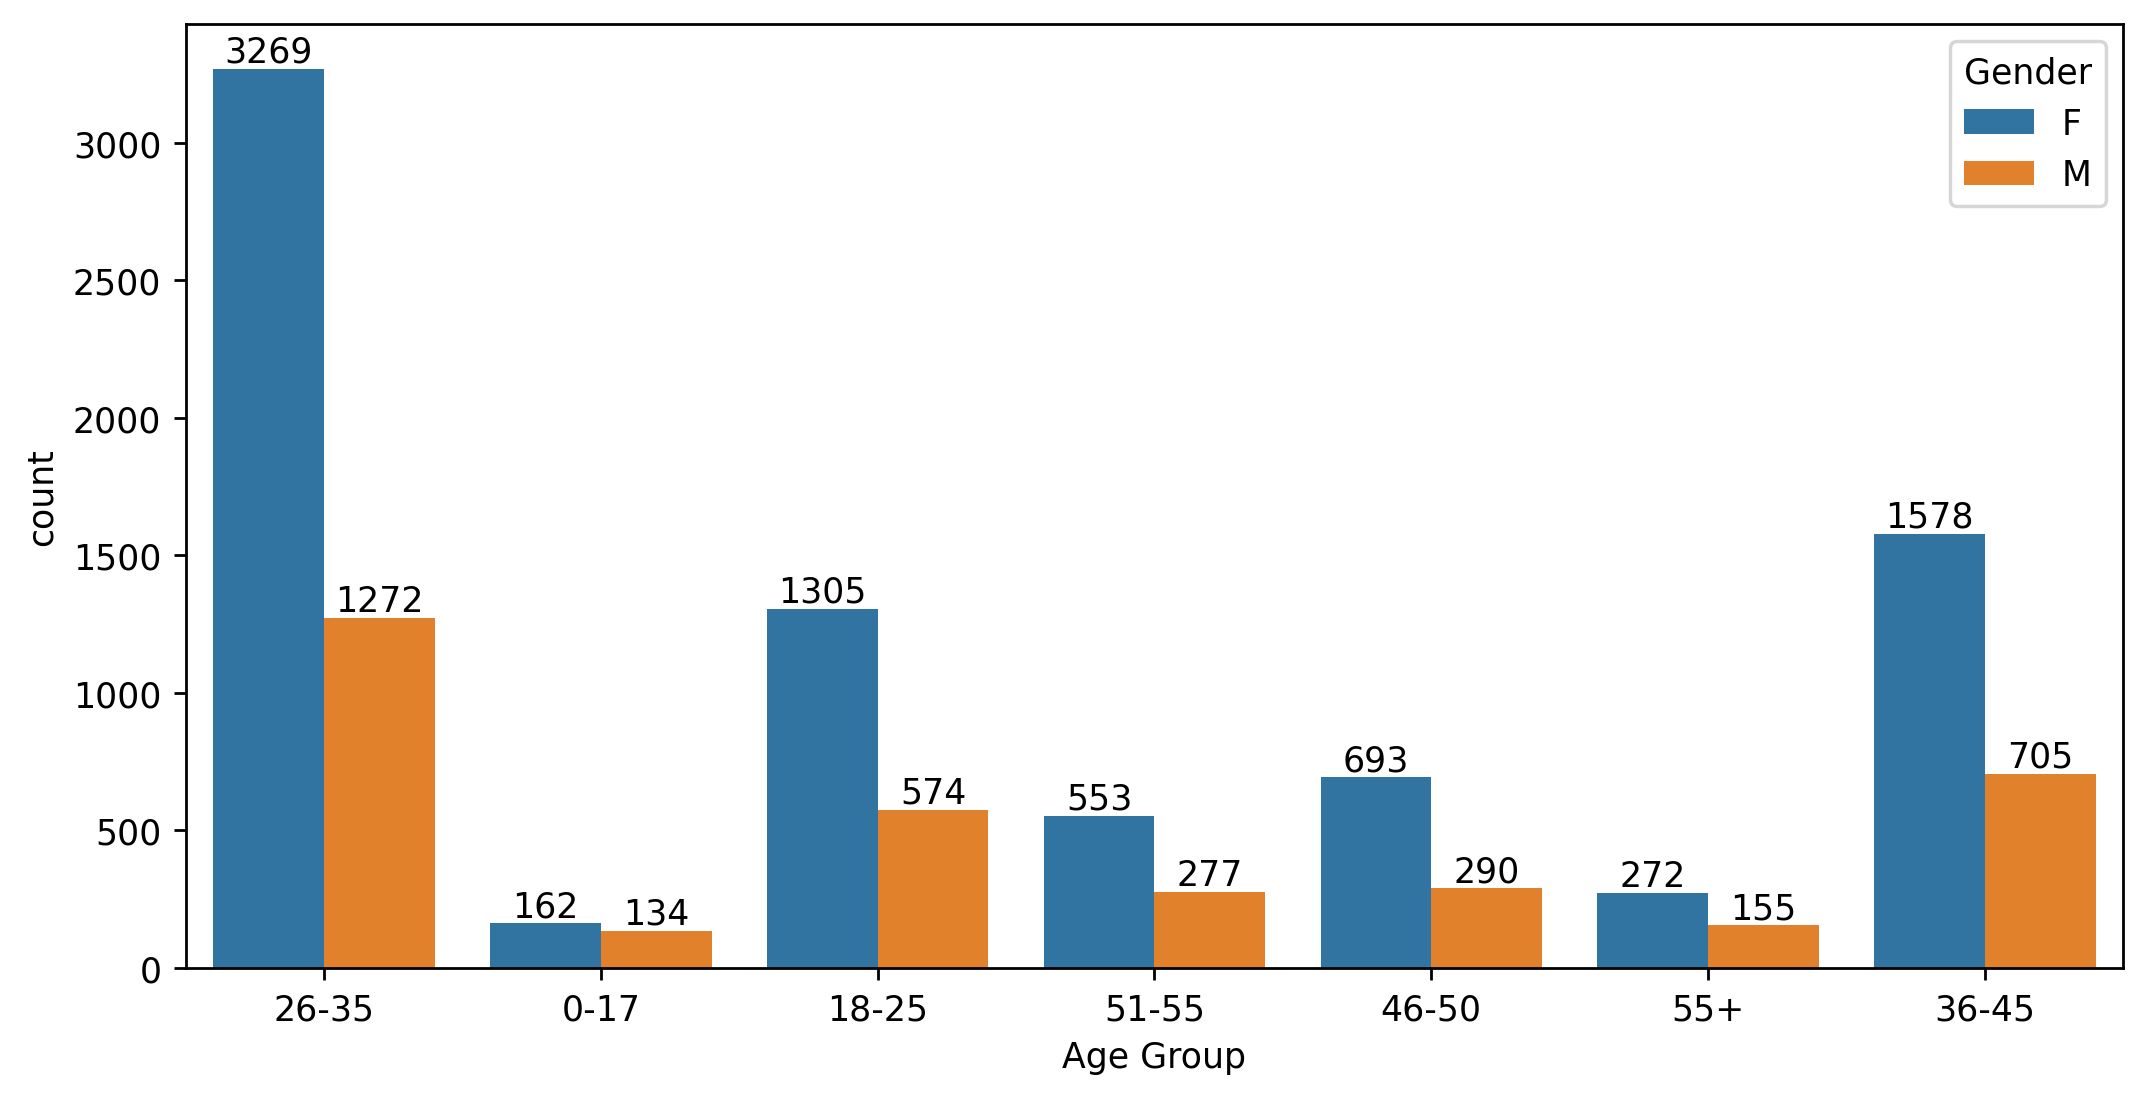

In [62]:
ag = sns.countplot(x='Age Group', data=df, hue = 'Gender')

for bars in ag.containers:
    ag.bar_label(bars)

In [68]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

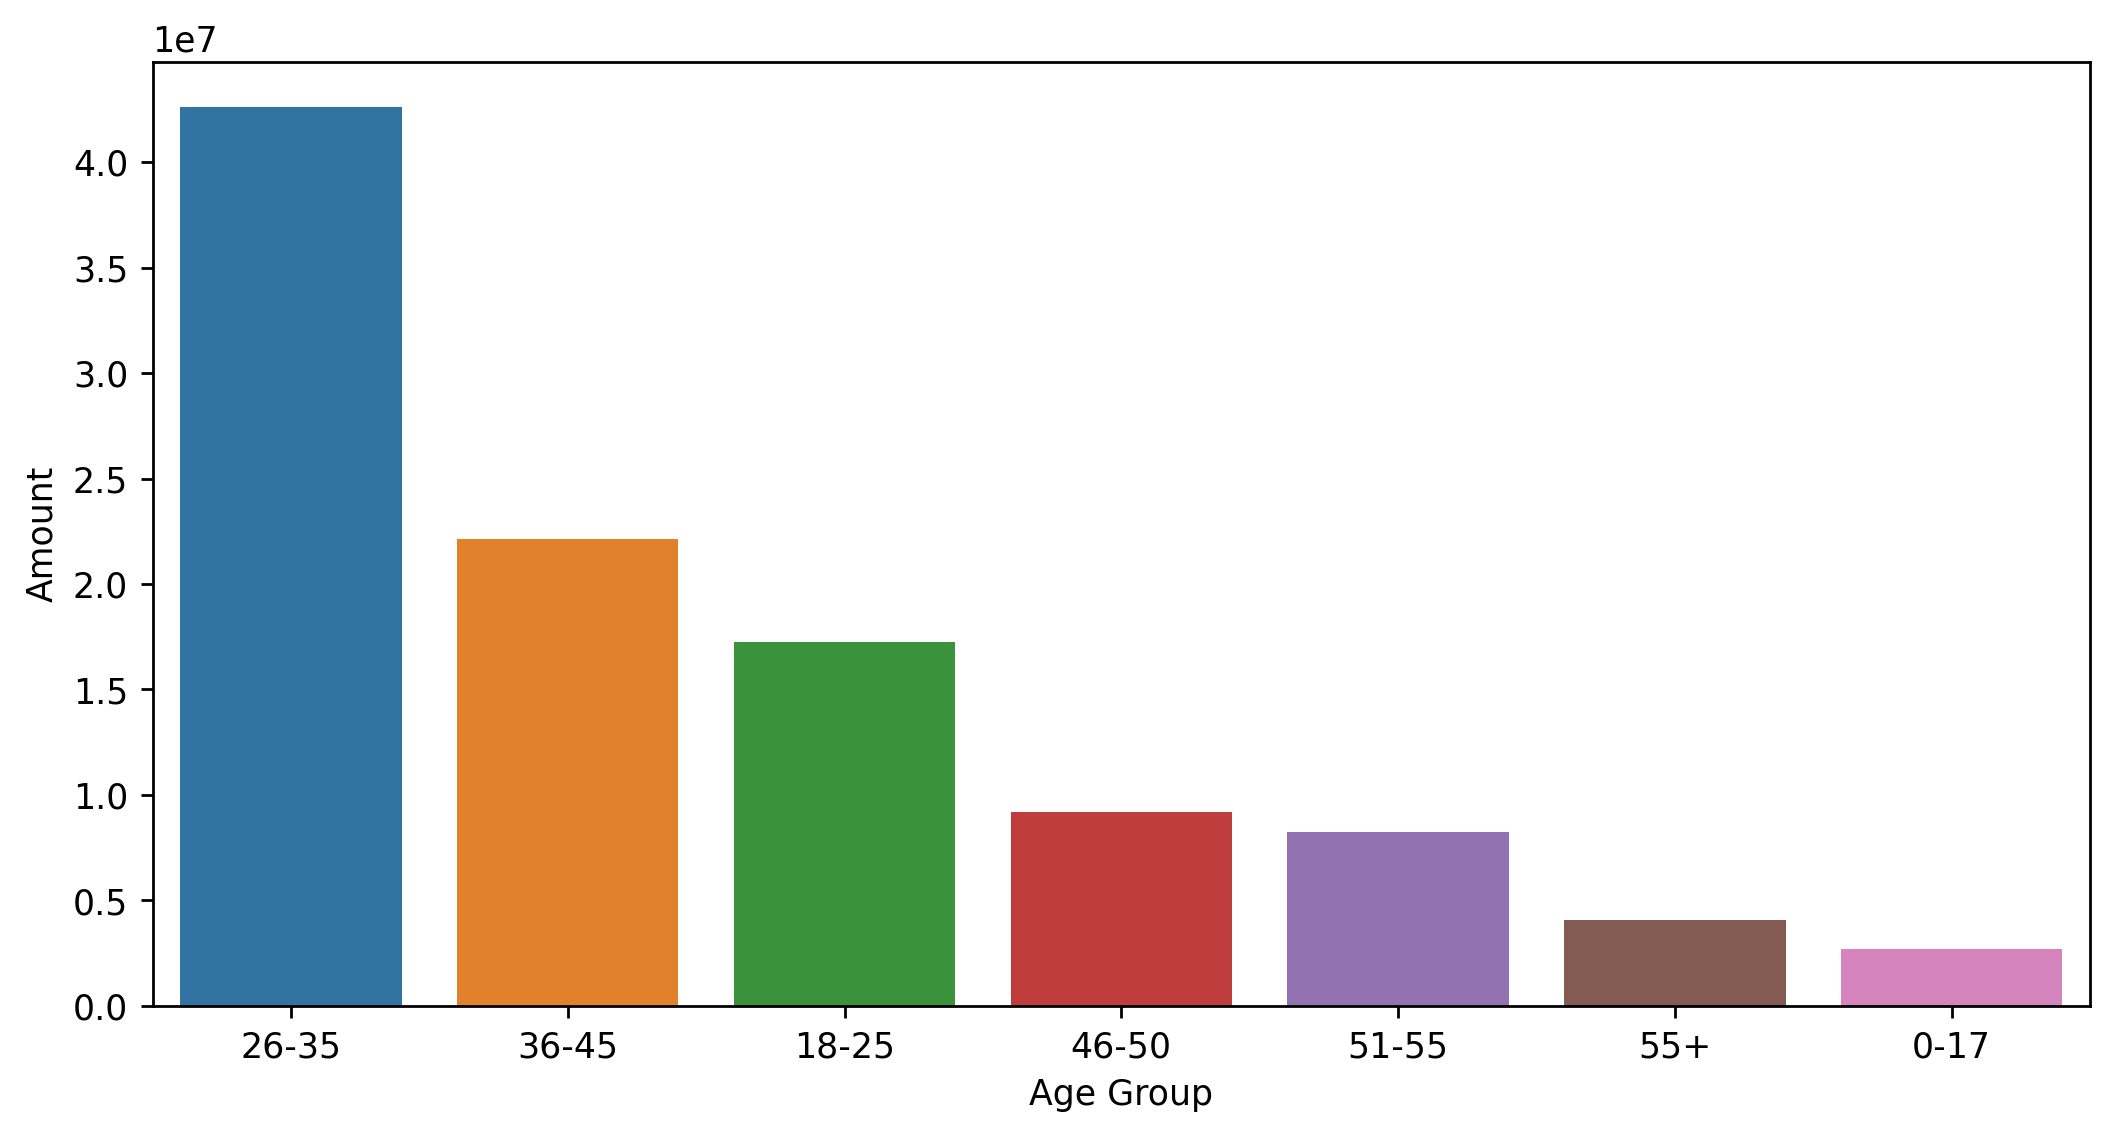

In [72]:
sns.barplot(x = 'Age Group', y = 'Amount', data=sales_age)

# State

In [79]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by=['Amount'], ascending = False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


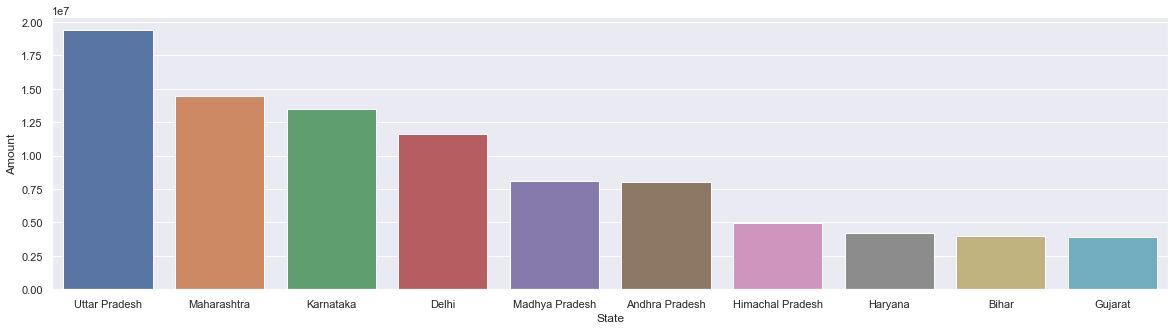

In [113]:
sns.barplot(x = 'State', y= 'Amount', data = sales_state)
sns.set(rc={'figure.figsize':(20,10)})

In [116]:
Sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by=['Orders'], ascending = False ).head(10)
Sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


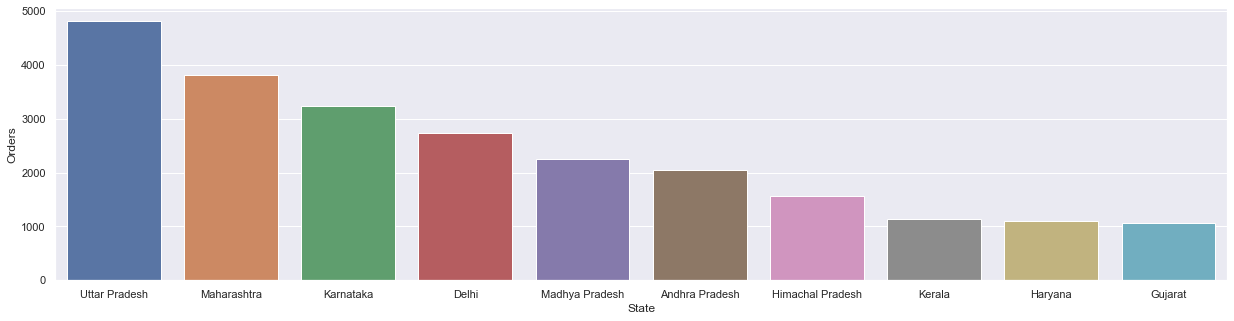

In [126]:
sns.barplot(x='State', y='Orders', data=Sales_state)
sns.set(rc={'figure.figsize':(21,7)})

From the above graphs, it can be concluded that maximum sales and orders have come form Uttar Pradesh, Followed by Maharashtra, Karnataka, Delhi and Madhya Pradesh.

# Marital Status

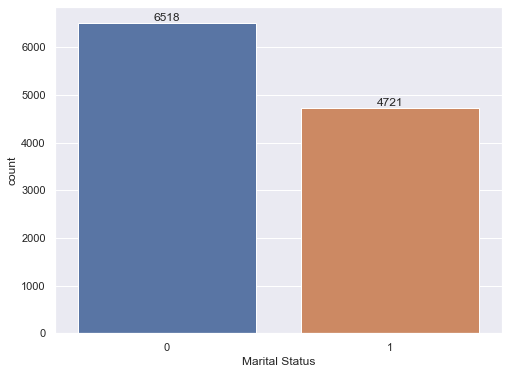

In [135]:
MS = sns.countplot(x='Marital Status', data = df)
sns.set(rc={'figure.figsize':(8,6)})

for bars in MS.containers:
    MS.bar_label(bars)

In [ ]:
#here, 0=Married & 1= Unmarried

In [138]:
sales_MS = df.groupby(['Marital Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by=['Amount'], ascending = False)
sales_MS

,Marital Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<AxesSubplot:xlabel='Marital Status', ylabel='Amount'>

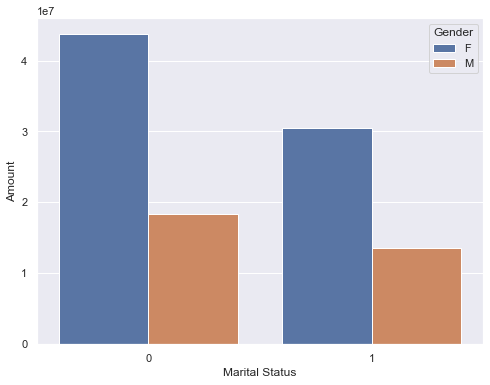

In [141]:
sns.barplot(x = 'Marital Status', y= 'Amount', hue='Gender', data=sales_MS)

In [142]:
#here, 0=Married & 1= Unmarried

From the above graphs, we can conclude that maximum buyers are married and most of them are women.

# Occupation

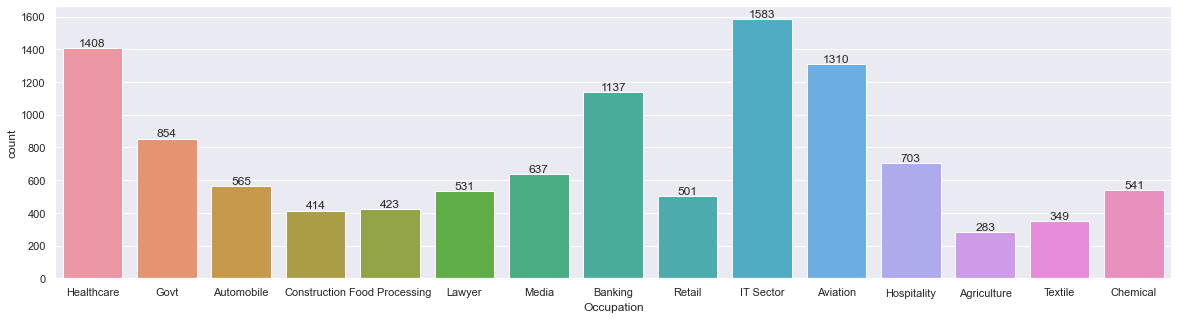

In [149]:
o = sns.countplot(data=df, x = 'Occupation')

sns.set(rc={'figure.figsize':(20,5)})

for bars in o.containers:
    o.bar_label(bars)

In [150]:
sales_o = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False)
sales_o

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

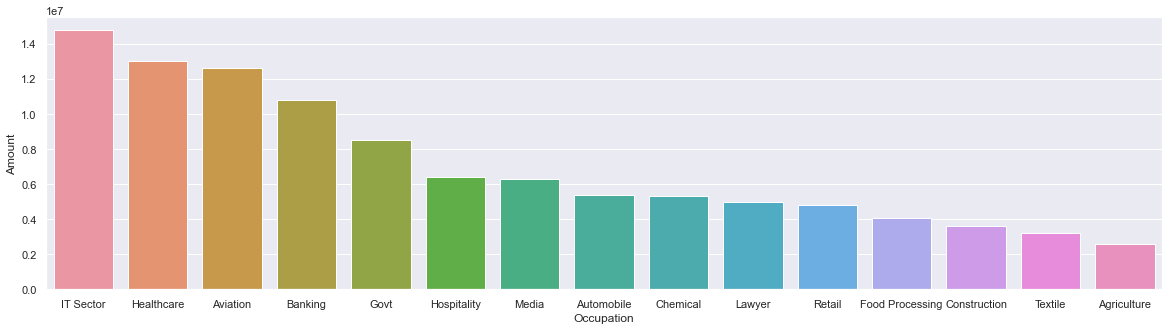

In [153]:
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Occupation', y='Amount', data=sales_o)

From the above graphs we can conclude that most of the sales are comming from the IT sector, followed by Healthcare, Aviation, Banking, and Government Sectors

# Product Category

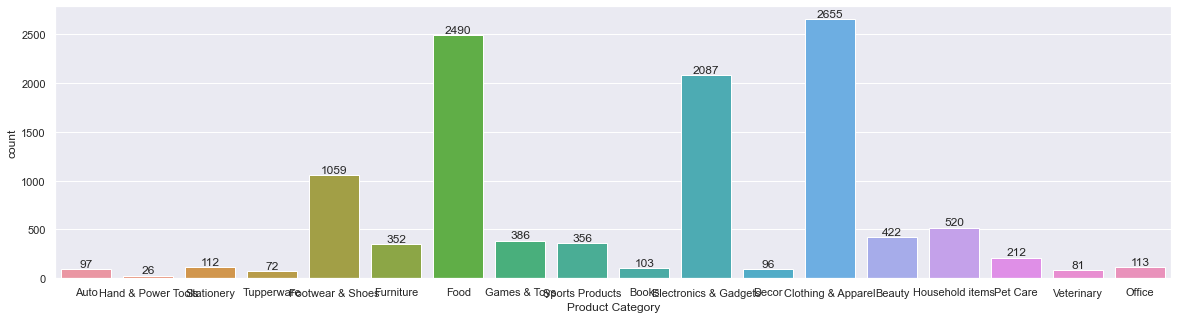

In [157]:
sns.set(rc={'figure.figsize':(20,5)})

PC = sns.countplot(x = 'Product Category', data=df)

for bars in PC.containers:
    PC.bar_label(bars)

In [160]:
sales_PC = df.groupby(['Product Category'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False).head(10)
sales_PC

,Product Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


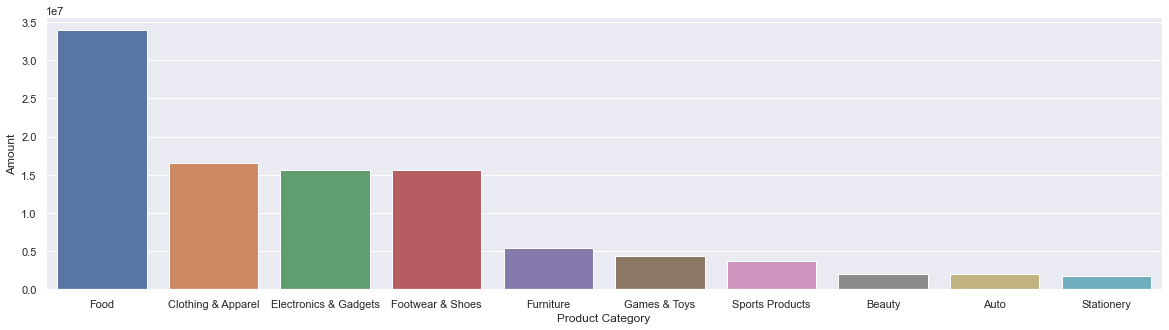

In [161]:
sns.barplot(x='Product Category', y='Amount', data= sales_PC)
sns.set(rc={'figure.figsize':(20,5)})

From the above graphs, we can conclude that maximum sales are occuring in Food category, followed by Clothing, Electronics, and Footwear Categories

# 10 Most Sold Products

In [164]:
sales_p = df.groupby(['Product ID'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False).head(10)
sales_p

,Product ID,Amount
1679,P00265242,540136
644,P00110942,424833
1146,P00184942,401816
654,P00112142,341020
396,P00059442,338571
1504,P00237542,322363
388,P00058042,307040
642,P00110742,294548
643,P00110842,290661
492,P00080342,283309


<AxesSubplot:xlabel='Product ID', ylabel='Amount'>

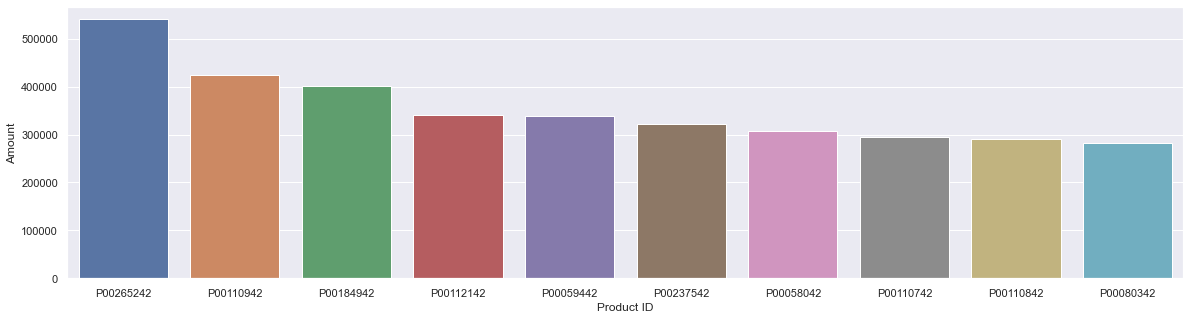

In [165]:
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x= 'Product ID', y='Amount', data=sales_p)

<AxesSubplot:xlabel='Product ID'>

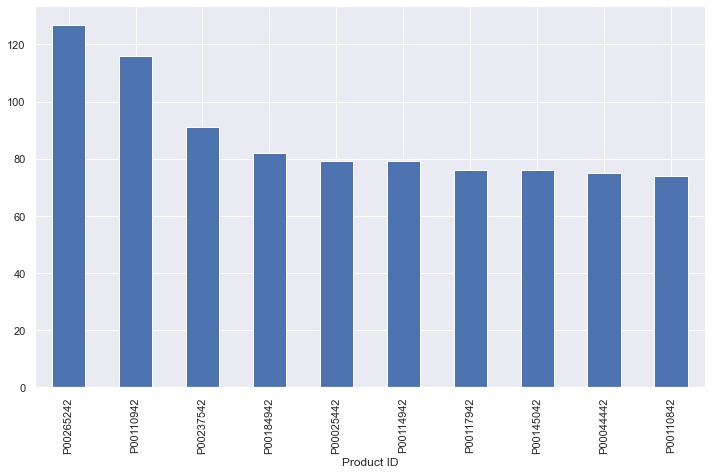

In [166]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

From the above graphs, we can conclude that products with ID P00265242 is the most sold product.

# Conclusion

From the above analysis, we can conclude that married women in the age group of 26-35 yrs residing in UP, Maharastra and Karnataka working in IT, Healthcare and Aviation sectors are more likely to buy products from Food, Clothing and Electronics category.